<a href="https://colab.research.google.com/github/skovz99/Stock_Percentile/blob/main/Updated_RSI_and_Combo_with_Past_Percentage_Movement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Run this cell prior to running cell below***

In [ ]:
# define a function for stock percentile
  # high/low/close usage
  # how many periods to look into the future for
  # how periods into the past to look back to create the percentage
  # choosen value of percentile
  # whether to test to see if the stcok goes up or down
  # the percentage above or below the stock to check for when doing the percentile logic function
import pandas as pd
import numpy as np
import math
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

def stock_percentile(stock_ticker, h_l_c, future_periods, past_periods, percentile, gain_loss, percentage_check, keep = 'True'):
  # importing the stock information from the ticker
  price_history = yf.Ticker(stock_ticker).history(period='max', interval='1d', actions=False)
  df = pd.DataFrame(price_history)
  # running the arguments
  if past_periods == 0:
    df['Past Percentage Shift'] = ((df['Close'] - df['Open'])/(df['Open'])) * 100
    if h_l_c == 'h':
      df['Day Shift Up'] = df['High'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['High'] + (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['High'] - (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'l':
      df['Day Shift Up'] = df['Low'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Low'] + (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Low'] - (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'c':
      df['Day Shift Up'] = df['Close'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Close'] + (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Close'] - (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  elif past_periods > 0:
    if h_l_c == 'h':
      df['Past Percentage Shift'] = ((df['High'].shift(periods = past_periods) - df['High'])/(df['High'])) * 100
      df['Day Shift Up'] = df['High'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['High'] + (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['High'] - (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'l':
      df['Past Percentage Shift'] = ((df['Low'].shift(periods = past_periods) - df['Low'])/(df['Low'])) * 100
      df['Day Shift Up'] = df['Low'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Low'] + (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Low'] - (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'c':
      df['Past Percentage Shift'] = ((df['Close'].shift(periods = past_periods) - df['Close'])/(df['Close'])) * 100
      df['Day Shift Up'] = df['Close'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Close'] + (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Close'] - (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  # current data and determining whether to drop certain kinds of values depending on the keep parameter
  df = df.dropna()
  if keep == 'False':
    if gain_loss == 'gain':
      df['Drop'] = np.where(df['Past Percentage Shift'] < 0, np.nan, 1)
    elif gain_loss == 'loss':
      df['Drop'] = np.where(df['Past Percentage Shift'] > 0, np.nan, 1)
  df = df.dropna()
  current_past_percentage_shift = df['Past Percentage Shift'].iloc[-1]
  list_past_percentage_shift = list(df['Past Percentage Shift'])
  percentile_rank = stats.percentileofscore(list_past_percentage_shift, current_past_percentage_shift)
  # calculating the percentile
  df = df.dropna()
  numpy_percentile = np.percentile(df['Past Percentage Shift'], percentile)
  df['Numpy Percentile'] = np.where(df['Past Percentage Shift'] > numpy_percentile, 1, np.nan)
  df = df.dropna()
  accuracy = (sum(df['Logic'])/(len(df))) * 100
  return accuracy, percentile_rank


### ***Run the Function below with the specific parameters:***

stock_ticker = 'example',

h_l_c = 'h', 'l', or 'c' (allows you to use either the high, the low or the close of each days stock trading in the function)

future_periods = integer (allows you to specify how far out into the future to test the percentage_check argument)

past_periods = integer (allows you to specify how far back into the past to calculate percentage movement to use in determining percentiles)

percentile = integer (allows you to specify what percentile among the past_periods you want to profile, typically this will be executed outside the function in a for loop)

gain_loss = 'gain' or 'loss' (allows you to specify whether to calculate the probability of success of the percentage_check in the future_periods at a specific percentile for either trading above or below the stock)

percentage_check = integer (allows you to create a stock price testing limit either below or above the stock to test on parameters already choosen)

keep = boolean 'True' or 'False' (allows you to drop certain kinds of past percentage shifts depending on whether you choose gain or loss. If gain is choosen, all past percentage shifts that are below zero are removed from the numpy percentile when keep is 'False'. If loss if choosen, all past percentage shifts that are above zero are remved from the numpy percentile when keep is 'False'. When 'True' is choosen, all past percentage shifts are kept.)

### ***Past Percentage Movement Percentile plotted against the average chance of success of the backtest***

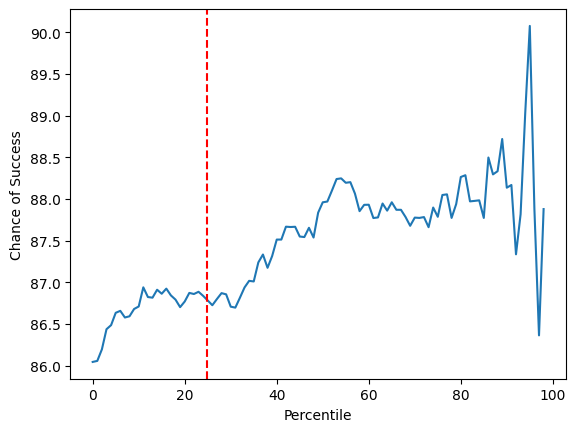

The percentile rank of the current day with respect to the past periods of same type is 24.816625916870414.


In [ ]:
# this will return a plot of the accuracy of the percentage_check in the future_period using the past_periods for the numpy percentile for all percentiles between 1 and 99 step of 1
# red dashed line denotes the current percentile when using the parameters choose for past_periods
# chance of success represents the average of all the data points that are greater than that percentile
all_percentile = []
for x in range(1, 100):
  stock, percentile = stock_percentile(stock_ticker = 'TSLA', h_l_c = 'c', future_periods = 40, past_periods = 10, percentile = x, gain_loss = 'loss', percentage_check = 15, keep = 'True')
  all_percentile.append(stock)

plt.plot(all_percentile)
plt.xlabel('Past Percentage Movement Percentile')
plt.ylabel('Chance of Success')
plt.axvline(x=percentile, color='red', linestyle='--')
plt.show()

print(f'The past percentage movement percentile rank of the current day with respect to the past periods of same type is {percentile}.')

### ***Includes the Ability to Access the RSI Percentiles of the Stock. Run this cell prior to running plotting cell below***

arguments:

stock_ticker: takes a string of characters identical to the stock's ticker regular ticker symbol present on yahoo finance

h_l_c: takes a string of either 'h', 'l' or 'c' to denote whether to use the high, low or close of each day to calculate the RSI

future_periods: take an integer to calculate how many days into the future to determine the success of a given trade (percentage_check)

percentile: takes an integer. Present within a loop to determine percentiles between 1 and 100 outside of the function.

gain_loss: takes a string of 'gain' or 'loss' to denote whether to assess the accuracy of percentage_check below or above the current stock price

percentage_check: takes an integer to calculate the percentage distance from the all stock prices (high, low or close) to be used in backtesting

remove_crtain_RSI: takes a string boolean as 'True' or 'False'. If 'True' is selected, all RSIs below 50 will be removed from percentile calculation if current RSI is above 50 or all RSIs above and including 50 will be removed from percentile calculation if current RSI is less than 50. If 'False' is selected, all RSIs are used in assessing percentile.

RSI_period: takes an integer. Default set to a window size of 14.

In [2]:
from pandas.io.excel import register_writer
import pandas as pd
import numpy as np
import math
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

def stock_percentile_RSI(stock_ticker, h_l_c, future_periods, percentile, gain_loss, percentage_check, remove_certain_RSI = 'False', RSI_period = 14):
  price_history = yf.Ticker(stock_ticker).history(period='max', interval='1d', actions=False)
  df = pd.DataFrame(price_history)
  if h_l_c == 'h':
    price_diff = df['High'].diff(1)
    gains = price_diff.where(price_diff > 0, 0)
    losses = -price_diff.where(price_diff < 0, 0)
    avg_gain = gains.rolling(window=RSI_period).mean()
    avg_loss = losses.rolling(window=RSI_period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi
    df['Day Shift Up'] = df['High'].shift(periods = (future_periods) * -1)
    if gain_loss == 'gain':
      df['Percentage'] = df['High'] + (df['High'] * (percentage_check/100))
      df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
    elif gain_loss == 'loss':
      df['Percentage'] = df['High'] - (df['High'] * (percentage_check/100))
      df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  elif h_l_c == 'l':
    price_diff = df['Low'].diff(1)
    gains = price_diff.where(price_diff > 0, 0)
    losses = -price_diff.where(price_diff < 0, 0)
    avg_gain = gains.rolling(window=RSI_period).mean()
    avg_loss = losses.rolling(window=RSI_period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi
    df['Day Shift Up'] = df['Low'].shift(periods = (future_periods) * -1)
    if gain_loss == 'gain':
      df['Percentage'] = df['Low'] + (df['Low'] * (percentage_check/100))
      df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
    elif gain_loss == 'loss':
      df['Percentage'] = df['Low'] - (df['Low'] * (percentage_check/100))
      df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  elif h_l_c == 'c':
    price_diff = df['Close'].diff(1)
    gains = price_diff.where(price_diff > 0, 0)
    losses = -price_diff.where(price_diff < 0, 0)
    avg_gain = gains.rolling(window=RSI_period).mean()
    avg_loss = losses.rolling(window=RSI_period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    df['RSI'] = rsi
    df['Day Shift Up'] = df['Close'].shift(periods = (future_periods) * -1)
    if gain_loss == 'gain':
      df['Percentage'] = df['Close'] + (df['Close'] * (percentage_check/100))
      df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
    elif gain_loss == 'loss':
      df['Percentage'] = df['Close'] - (df['Close'] * (percentage_check/100))
      df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  df = df.dropna()
  current_RSI = df['RSI'].iloc[-1]
  if remove_certain_RSI == 'True':
    if current_RSI >= 50:
      df['Remove RSI'] = np.where(df['RSI'] < 50, np.nan, 1)
    elif current_RSI < 50:
      df['Remove RSI'] = np.where(df['RSI'] >= 50, np.nan, 1)
  df = df.dropna()
  list_RSI = list(df['RSI'])
  percentile_rank = stats.percentileofscore(list_RSI, current_RSI)
  df = df.dropna()
  numpy_percentile = np.percentile(df['RSI'], percentile)
  df['Numpy Percentile'] = np.where(df['RSI'] > numpy_percentile, 1, np.nan)
  df = df.dropna()
  accuracy = (sum(df['Logic'])/(len(df))) * 100
  return accuracy, percentile_rank



### ***Plot RSI Percentile versus the average chance of success of the backtested trade for all percentiles greater than it***

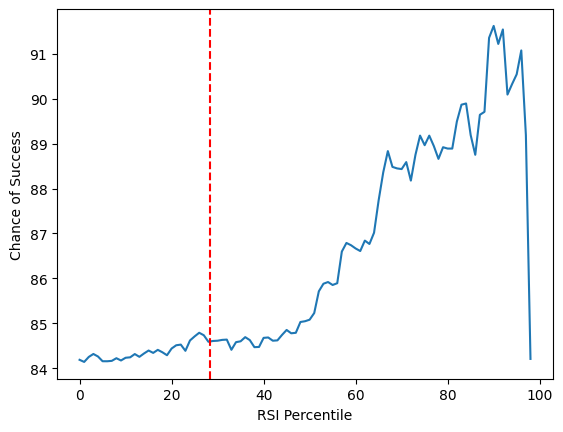

The RSI percentile rank of the current day with respect to the past periods of same type is 28.370330265295074.


In [3]:
all_percentile = []
for x in range(1, 100):
  RSI, percentile = stock_percentile_RSI(stock_ticker = 'TSLA', h_l_c = 'c', future_periods = 40, percentile = x, gain_loss = 'loss', percentage_check = 15, remove_certain_RSI = 'True', RSI_period = 14)
  all_percentile.append(RSI)

plt.plot(all_percentile)
plt.xlabel('RSI Percentile')
plt.ylabel('Chance of Success')
plt.axvline(x=percentile, color='red', linestyle='--')
plt.show()

print(f'The RSI percentile rank of the current day with respect to the past periods of same type is {percentile}.')

### ***Combination of RSI and past percentage movement into the same percentile***

In [13]:
from sklearn.preprocessing import StandardScaler

def RSI_past_movement_percentile(stock_ticker, h_l_c, future_periods, past_periods, percentile, gain_loss, percentage_check, remove_certain_RSI = 'False', keep = 'True', RSI_period = 14):
  price_history = yf.Ticker(stock_ticker).history(period='max', interval='1d', actions=False)
  df = pd.DataFrame(price_history)
  # running the arguments
  if past_periods == 0:
    df['Past Percentage Shift'] = ((df['Close'] - df['Open'])/(df['Open'])) * 100
    if h_l_c == 'h':
      price_diff = df['High'].diff(1)
      gains = price_diff.where(price_diff > 0, 0)
      losses = -price_diff.where(price_diff < 0, 0)
      avg_gain = gains.rolling(window=RSI_period).mean()
      avg_loss = losses.rolling(window=RSI_period).mean()
      rs = avg_gain / avg_loss
      rsi = 100 - (100 / (1 + rs))
      df['RSI'] = rsi
      df['Day Shift Up'] = df['High'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['High'] + (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['High'] - (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'l':
      price_diff = df['Low'].diff(1)
      gains = price_diff.where(price_diff > 0, 0)
      losses = -price_diff.where(price_diff < 0, 0)
      avg_gain = gains.rolling(window=RSI_period).mean()
      avg_loss = losses.rolling(window=RSI_period).mean()
      rs = avg_gain / avg_loss
      rsi = 100 - (100 / (1 + rs))
      df['RSI'] = rsi
      df['Day Shift Up'] = df['Low'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Low'] + (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Low'] - (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'c':
      price_diff = df['Close'].diff(1)
      gains = price_diff.where(price_diff > 0, 0)
      losses = -price_diff.where(price_diff < 0, 0)
      avg_gain = gains.rolling(window=RSI_period).mean()
      avg_loss = losses.rolling(window=RSI_period).mean()
      rs = avg_gain / avg_loss
      rsi = 100 - (100 / (1 + rs))
      df['RSI'] = rsi
      df['Day Shift Up'] = df['Close'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Close'] + (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Close'] - (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  elif past_periods > 0:
    if h_l_c == 'h':
      price_diff = df['High'].diff(1)
      gains = price_diff.where(price_diff > 0, 0)
      losses = -price_diff.where(price_diff < 0, 0)
      avg_gain = gains.rolling(window=RSI_period).mean()
      avg_loss = losses.rolling(window=RSI_period).mean()
      rs = avg_gain / avg_loss
      rsi = 100 - (100 / (1 + rs))
      df['RSI'] = rsi
      df['Past Percentage Shift'] = ((df['High'].shift(periods = past_periods) - df['High'])/(df['High'])) * 100
      df['Day Shift Up'] = df['High'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['High'] + (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['High'] - (df['High'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'l':
      price_diff = df['Low'].diff(1)
      gains = price_diff.where(price_diff > 0, 0)
      losses = -price_diff.where(price_diff < 0, 0)
      avg_gain = gains.rolling(window=RSI_period).mean()
      avg_loss = losses.rolling(window=RSI_period).mean()
      rs = avg_gain / avg_loss
      rsi = 100 - (100 / (1 + rs))
      df['RSI'] = rsi
      df['Past Percentage Shift'] = ((df['Low'].shift(periods = past_periods) - df['Low'])/(df['Low'])) * 100
      df['Day Shift Up'] = df['Low'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Low'] + (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Low'] - (df['Low'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
    elif h_l_c == 'c':
      price_diff = df['Close'].diff(1)
      gains = price_diff.where(price_diff > 0, 0)
      losses = -price_diff.where(price_diff < 0, 0)
      avg_gain = gains.rolling(window=RSI_period).mean()
      avg_loss = losses.rolling(window=RSI_period).mean()
      rs = avg_gain / avg_loss
      rsi = 100 - (100 / (1 + rs))
      df['RSI'] = rsi
      df['Past Percentage Shift'] = ((df['Close'].shift(periods = past_periods) - df['Close'])/(df['Close'])) * 100
      df['Day Shift Up'] = df['Close'].shift(periods = (future_periods) * -1)
      if gain_loss == 'gain':
        df['Percentage'] = df['Close'] + (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] > df['Day Shift Up'], 1, 0)
      elif gain_loss == 'loss':
        df['Percentage'] = df['Close'] - (df['Close'] * (percentage_check/100))
        df['Logic'] = np.where(df['Percentage'] < df['Day Shift Up'], 1, 0)
  # current data and determining whether to drop certain kinds of values depending on the keep and remove_certain_RSI parameters
  df = df.dropna()
  if keep == 'False':
    if gain_loss == 'gain':
      df['Drop'] = np.where(df['Past Percentage Shift'] < 0, np.nan, 1)
    elif gain_loss == 'loss':
      df['Drop'] = np.where(df['Past Percentage Shift'] > 0, np.nan, 1)
  current_RSI = df['RSI'].iloc[-1]
  if remove_certain_RSI == 'True':
    if current_RSI >= 50:
      df['Remove RSI'] = np.where(df['RSI'] < 50, np.nan, 1)
    elif current_RSI < 50:
      df['Remove RSI'] = np.where(df['RSI'] >= 50, np.nan, 1)
  df = df.dropna()
  # nromalize RSI and past percentage movement and then add them together to determine percentile
  scaler = StandardScaler()
  past_percentage_shift_reshape = df['Past Percentage Shift'].values.reshape(-1, 1)
  rsi_reshape = df['RSI'].values.reshape(-1, 1)
  scaled_past_percentage_shift = scaler.fit_transform(past_percentage_shift_reshape)
  scaled_rsi = scaler.fit_transform(rsi_reshape)
  df['Standardized Past Percentage Shift'] = scaled_past_percentage_shift
  df['Standardized RSI'] = scaled_rsi
  df['Combined Past and RSI'] = df['Standardized Past Percentage Shift'] + df['Standardized RSI']
  list_combined = list(df['Combined Past and RSI'])
  current_combined = df['Combined Past and RSI'].iloc[-1]
  percentile_rank = stats.percentileofscore(list_combined, current_combined)
  numpy_percentile = np.percentile(df['Combined Past and RSI'], percentile)
  df['Numpy Percentile'] = np.where(df['Combined Past and RSI'] > numpy_percentile, 1, np.nan)
  df = df.dropna()
  accuracy = (sum(df['Logic'])/(len(df))) * 100
  return accuracy, percentile_rank


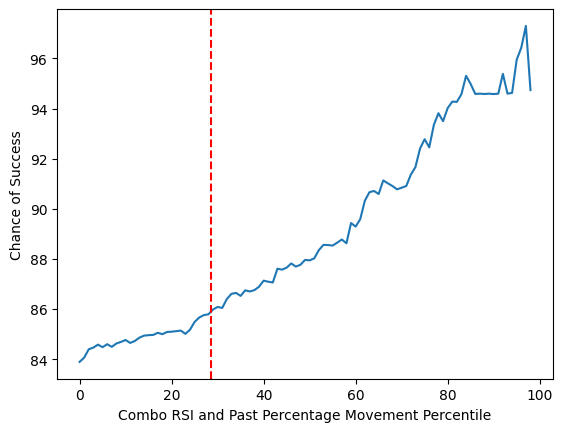

The combined percentile rank of RSI and past percentage movement of the current day with respect to the past periods of same type is 28.63340563991323.


In [16]:
all_percentile = []
for x in range(1, 100):
  combo, percentile = RSI_past_movement_percentile(stock_ticker = 'TSLA', h_l_c = 'c', future_periods = 40, past_periods = 20, percentile = x, gain_loss = 'loss', percentage_check = 15, remove_certain_RSI = 'True', keep = 'True', RSI_period = 14)
  all_percentile.append(combo)

plt.plot(all_percentile)
plt.xlabel('Combo RSI and Past Percentage Movement Percentile')
plt.ylabel('Chance of Success')
plt.axvline(x=percentile, color='red', linestyle='--')
plt.show()

print(f'The combined percentile rank of RSI and past percentage movement of the current day with respect to the past periods of same type is {percentile}.')